# Get and interpret feature importances of a tree-based model

In this section, we'll implement a decision tree model on a new data set about wine quality. This data is available with the scikit-learn dataset library.

The wine dataset is a classic and very easy multi-class classification dataset.

Three classes with samples per class of: [59,71,48]

1.) Samples total - 178

2.) Dimensionality - 13

3.) Features - real, positive

The goal is to classify wine into one of three classes using the characteristic features such as alcohol content, flavor, hue, etc.

In [1]:
# Import libraries and data sets
from sklearn.datasets import load_wine
import pandas as pd

# Load the data and convert to a DataFrame
data = load_wine()
df_wine = pd.DataFrame(data.data, columns=data.feature_names)
df_wine['target'] = pd.Series(data.target)

display(df_wine.shape)
df_wine.head()

(178, 14)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Here we have 13 features and one target column. The features are numeric so we won't need to worry about categorical encoding for this example. We first need to create our feature matrix and target array.

In [2]:
# Separate into features and target
X = df_wine.drop('target', axis=1)
y = df_wine['target']

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [3]:
# Use the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
classifier=DecisionTreeClassifier()

# Train the model using the training sets
classifier.fit(X_train,y_train)

# Find the model score
print("Decision tree model score: %.3f" % classifier.score(X_test, y_test))

Decision tree model score: 0.933


We fit a decision tree model! The results look good. The model seems to be able to predict the class of wine quite well given the 13 characteristics. Now, let's look at feature importance. We do this by plotting each feature's contribution to the model on a bar chart. The total contribution of all the features is normalized to 100 (or sometimes 1), so each feature is some percentage of that.

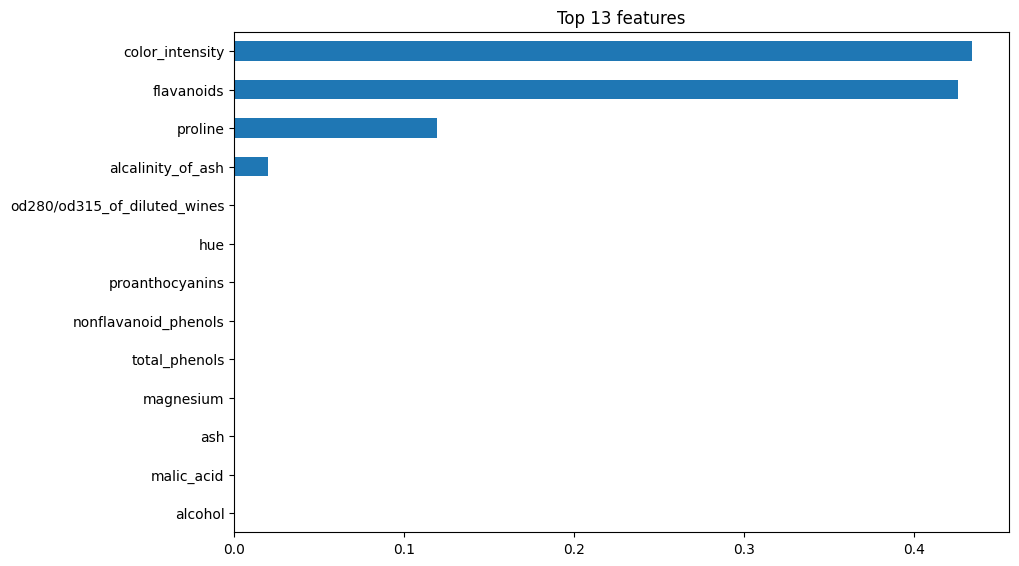

In [4]:
# Plot the feature importances
import matplotlib.pyplot as plt

importances = pd.Series(classifier.feature_importances_, X.columns)

# Plot top n feature importances
n = 13
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh()

plt.show()

For our model, it looks like the top three features contribute the most to the model, by a significant fraction.